# Calculating $\pi$ using Monte Carlo

To estimate the value of Pi using the Monte Carlo method we generate a large number of random points (similar to **launching darts**) and see how many fall in the circle enclosed by the unit square:

$\pi = 4 * \frac{N_{hits}}{N_{total}}$

![Pi](http://hadoop.cesga.es/files/calculating-pi.gif)

You can see a demo here: [Estimating Pi with Monte Carlo demo](https://academo.org/demos/estimating-pi-monte-carlo/)

# Implementation

In [2]:
from __future__ import print_function
from random import random
from operator import add
import time

In [3]:
# Number of points to generate
POINTS = 10**8
# Number of partitions to use in the Spark program
PARTITIONS = 20

In [4]:
def launch_dart(_):
    "Shoot a new random dart in the (1, 1) cuadrant and return 1 if it is inside the circle, 0 otherwise"
    x = random()
    y = random()
    return 1 if x ** 2 + y ** 2 < 1 else 0

## Serial implementation using Python

In [5]:
start = time.time()
hits = 0
for _ in range(POINTS):
    hits += launch_dart(_)
end = time.time()
print('Elapsed time:', end - start)
print('Pi is roughly', 4.0 * hits / POINTS)

Elapsed time: 23.567826509475708
Pi is roughly 3.1417462


NOTE: If you are using Python 3 instead of the `xrange` function you would use `range`.https://treyhunner.com/2018/02/python-3-s-range-better-than-python-2-s-xrange/

## Parallel implementation using Spark

In [8]:
start = time.time()
hits = sc.parallelize(xrange(POINTS), PARTITIONS).map(launch_dart).reduce(add)
end = time.time()
print('Elapsed time:', end - start)
print('Pi is roughly', 4.0 * hits / POINTS)

Elapsed time: 9.7909719944
Pi is roughly 3.14167076


NOTE: If you are using Python 3 instead of the `xrange` function you would use `range`.

## Explore the paralellism

Explore how changing the number of points and the number partitions affects the elapsed time of each implementation.

- We can increase POINTS from `10**6` to `10**8`, in this case the sequential execution will need more than 60 seconds.
- Take into account that just re-running again the spark calculation reduces the time because the executors are already launched so the application startup time is shorter.

Os resultados que obteño eu xogando no curso. 

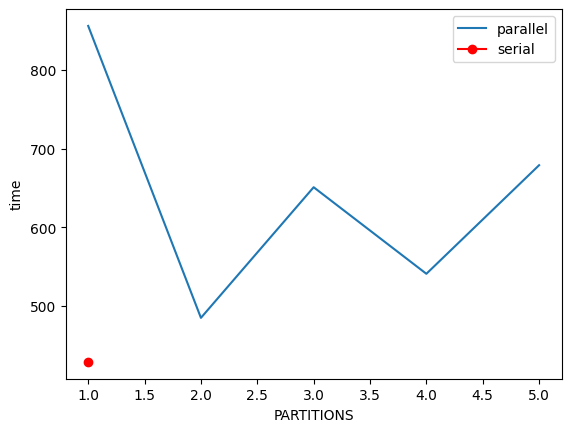

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[856, 485, 651, 541, 679],label='parallel')
plt.plot(1, 429, '-ro', label='serial')
plt.xlabel('PARTITIONS')
plt.ylabel('time')
plt.legend()
plt.show()

Explicación do profe, cómpre ter en conta os tempos de subida e baixada de datos

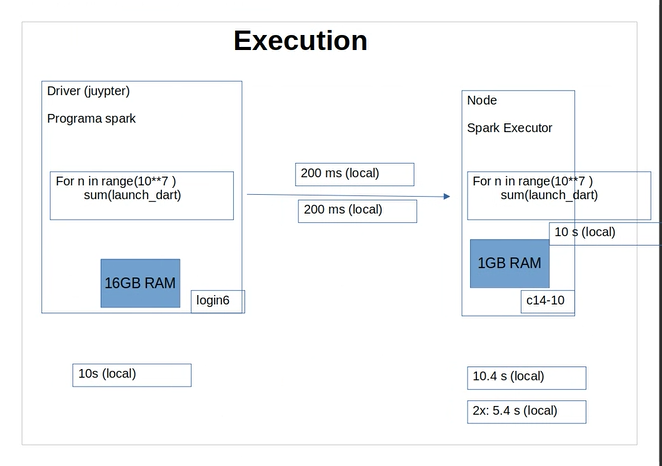